<a href="https://colab.research.google.com/github/Susmi0350/Heart-Disease-Prediction/blob/main/Project_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import the dependencies

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data collection and processing

In [2]:
# loading csv data to pandas dataframe
heart_data = pd.read_csv('/content/heart_disease_data.csv')


In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
heart_data.shape

(303, 14)

In [6]:
# getting info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [8]:
#statistical measure about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#checking the distribution of target column
heart_data['target'].value_counts()

,count
target,
1,165
0,138


1 ---> defective

0 ---> healthy


In [10]:
#splitting feature and target
X = heart_data.drop(columns = 'target',axis =1)
Y = heart_data['target']


In [11]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
Y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [13]:
#splitting data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [14]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


Model training

In [15]:
model = LogisticRegression()

In [16]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

accuracy score


In [17]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [18]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.8512396694214877


In [19]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [20]:
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.819672131147541


In [21]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, X_test_prediction))


              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Make predictions
X_test_prediction = model.predict(X_test)

# Accuracy
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

# Precision
test_data_precision = precision_score(Y_test, X_test_prediction)

# Recall
test_data_recall = recall_score(Y_test, X_test_prediction)

# Print results
print("✅ Logistic Regression Results:")
print("Accuracy:", test_data_accuracy)
print("Precision:", test_data_precision)
print("Recall:", test_data_recall)
print("\nClassification Report:\n", classification_report(Y_test, X_test_prediction))


✅ Logistic Regression Results:
Accuracy: 0.819672131147541
Precision: 0.84375
Recall: 0.8181818181818182

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [23]:
from sklearn.metrics import f1_score

# F1 Score
test_data_f1 = f1_score(Y_test, X_test_prediction)

print("F1 Score:", test_data_f1)


F1 Score: 0.8307692307692308


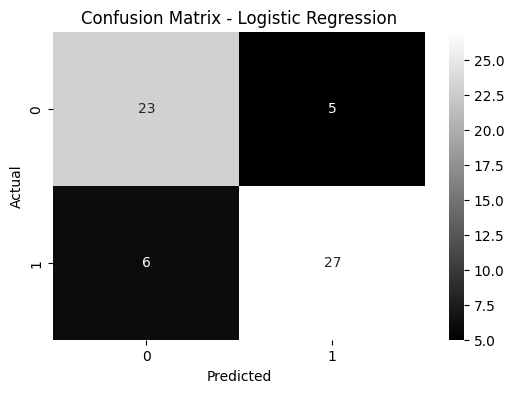

In [69]:
cm = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='gray')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)

#change input data to  numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if (prediction[0]==0):
  print('The person does not have a heart disease')
else:
  print('The person has heart disease')

[1]
The person has heart disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Evaluating GBM

In [25]:
gbm = GradientBoostingClassifier(
    n_estimators=100,     # Number of boosting stages
    learning_rate=0.1,    # Step size shrinkage
    max_depth=3,          # Max depth of each tree
    random_state=42
)

Train GBM Model

In [28]:
gbm.fit(X_train, Y_train)


GradientBoostingClassifier(random_state=42)

Prediction

In [29]:
y_pred = gbm.predict(X_test)

In [54]:
print("✅ Gradient Boosting Classifier Results:")
print("Accuracy Score:", accuracy_score(Y_test, y_pred))
print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))


✅ Gradient Boosting Classifier Results:
Accuracy Score: 0.7377049180327869
Precision: 0.7741935483870968
Recall: 0.7272727272727273

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.75      0.72        28
           1       0.77      0.73      0.75        33

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [55]:
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(Y_test, y_pred))


F1 Score: 0.75


Confusion matrix for GBM

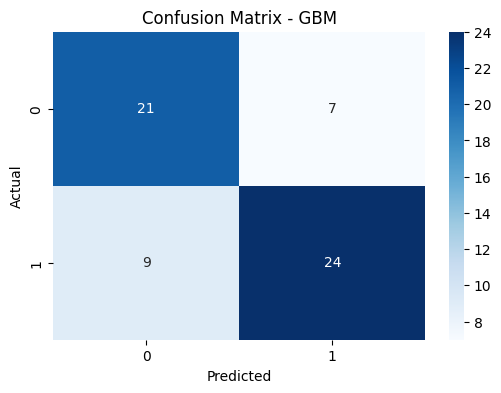

In [33]:
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - GBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, Y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Best Accuracy: 0.8304421768707483


**XGBoost**

In [36]:
pip install xgboost

Initialise XGBoost model


In [40]:
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)


In [42]:
xgb.fit(X_train, Y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:33:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

Prediction

In [43]:
y_pred_xgb = xgb.predict(X_test)

Evaluation

In [56]:
print("✅ XGBoost Classifier Results:")
print("Accuracy Score:", accuracy_score(Y_test, y_pred_xgb))
print("Precision:", precision_score(Y_test, y_pred_xgb))
print("Recall:", recall_score(Y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_xgb))


✅ XGBoost Classifier Results:
Accuracy Score: 0.7704918032786885
Precision: 0.7878787878787878
Recall: 0.7878787878787878

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [57]:
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(Y_test, y_pred_xgb))


F1 Score: 0.7878787878787878


Confusion matrix of XGBoost

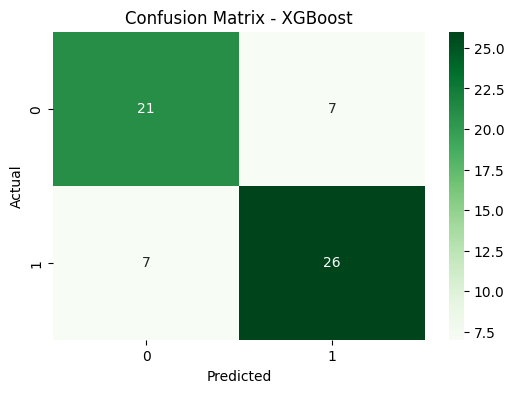

In [46]:
cm = confusion_matrix(Y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**LightGBM**

In [47]:
pip install lightgbm


In [48]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [49]:
lgbm.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 132, number of negative: 110
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.545455 -> initscore=0.182322
[LightGBM] [Info] Start training from score 0.182322
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier(max_depth=3, random_state=42)

Prediction

In [51]:
y_pred_lgbm = lgbm.predict(X_test)

Evaluation of LightGBM

In [58]:
print("✅ LightGBM Classifier Results:")
print("Accuracy Score:", accuracy_score(Y_test, y_pred_lgbm))
print("Precision:", precision_score(Y_test, y_pred_lgbm))
print("Recall:", recall_score(Y_test, y_pred_lgbm))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_lgbm))


✅ LightGBM Classifier Results:
Accuracy Score: 0.7704918032786885
Precision: 0.7878787878787878
Recall: 0.7878787878787878

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [59]:
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(Y_test, y_pred_lgbm))


F1 Score: 0.7878787878787878


Confusion matrix for LightGBM

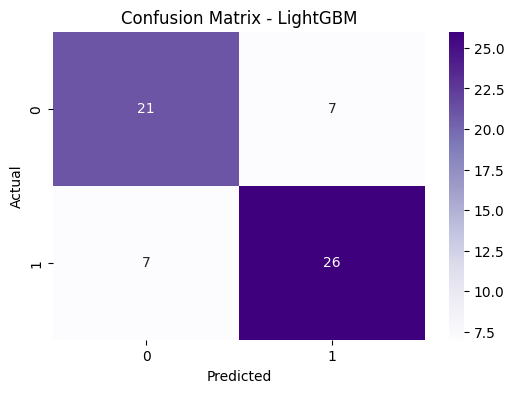

In [53]:
cm = confusion_matrix(Y_test, y_pred_lgbm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()